In [2982]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt


In [2983]:
import warnings
warnings.filterwarnings('ignore')

In [2984]:
df = pd.read_csv("cars.csv")

In [2985]:
df

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...
887,Ta,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,2014,"1,80,000",Petrol,NaN


## data cleaning

In [2986]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   year        892 non-null    object
 2   Price       892 non-null    object
 3   kms_driven  840 non-null    object
 4   fuel_type   837 non-null    object
dtypes: object(5)
memory usage: 35.0+ KB


In [2987]:
df.isna().sum()

name           0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [2988]:
df["flag_na_driven"] = df["kms_driven"].isna()

In [2989]:
df[df["flag_na_driven"] == True]

,name,year,Price,kms_driven,fuel_type,flag_na_driven
69,I want to sell my car Tata Zest,2017,Ask For Price,NaN,NaN,True
85,I want to sell my car Tata Zest,2017,Ask For Price,NaN,NaN,True
185,"Commercial , DZire LDI, 2016, for sale",...,Ask For Price,NaN,NaN,True
195,"Tata indigo ecs LX, 201",150k,"1,50,000",NaN,NaN,True
206,MARUTI SUZUKI DESI,TOUR,"4,00,000",NaN,NaN,True
286,"Commercial , DZire LDI, 2016, for sale",...,Ask For Price,NaN,NaN,True
294,Yama,r 15,"55,000",NaN,NaN,True
360,selling car Ta,Zest,Ask For Price,NaN,NaN,True
368,Tata Zest 90,/-Rs,Ask For Price,NaN,NaN,True
385,Maruti Suzuki Swift Dzire car,sale,"3,00,000",NaN,NaN,True


In [2990]:
replace2 = []
for price in df["Price"]:
    letter = price.replace(",","")
    replace2.append(letter)
    

In [2991]:
replace2

['80000',
 '425000',
 'Ask For Price',
 '325000',
 '575000',
 'Ask For Price',
 '175000',
 '190000',
 '830000',
 '250000',
 '182000',
 '315000',
 '415000',
 '320000',
 '80000',
 '425000',
 '1000000',
 '500000',
 '350000',
 '160000',
 '350000',
 '310000',
 '75000',
 '100000',
 '100000',
 '100000',
 '190000',
 '290000',
 '95000',
 '180000',
 '385000',
 '250000',
 '180000',
 '105000',
 '105000',
 '650000',
 '689999',
 '448000',
 '549000',
 '501000',
 '489999',
 '280000',
 '250000',
 '349999',
 '284999',
 '345000',
 '499999',
 '235000',
 '249999',
 '1475000',
 '180000',
 '385000',
 '250000',
 '180000',
 '105000',
 '105000',
 '395000',
 '220000',
 '170000',
 '85000',
 '175000',
 '190000',
 '200000',
 '830000',
 '200000',
 '570000',
 '315000',
 '182000',
 '315000',
 'Ask For Price',
 '110000',
 '501000',
 '448999',
 '1891111',
 '235000',
 '159500',
 '344999',
 '344999',
 '449999',
 '1891111',
 '865000',
 '699000',
 '375000',
 '489999',
 '224999',
 'Ask For Price',
 '1200000',
 '195000',
 '35

In [2992]:
df["Price"] = replace2

In [2993]:
df["flag_price"] = df["Price"] != "Ask For Price"

In [2994]:
df = df[df["flag_price"] == True]

In [2995]:
df["Price"] = df["Price"].astype(float)

In [2996]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 891
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            857 non-null    object 
 1   year            857 non-null    object 
 2   Price           857 non-null    float64
 3   kms_driven      819 non-null    object 
 4   fuel_type       816 non-null    object 
 5   flag_na_driven  857 non-null    bool   
 6   flag_price      857 non-null    bool   
dtypes: bool(2), float64(1), object(4)
memory usage: 41.8+ KB


In [2997]:
df["Price"]  = df["Price"] / 100


In [2998]:
df

,name,year,Price,kms_driven,fuel_type,flag_na_driven,flag_price
0,Hyundai Santro Xing XO eRLX Euro III,2007,800.0,"45,000 kms",Petrol,False,True
1,Mahindra Jeep CL550 MDI,2006,4250.0,40 kms,Diesel,False,True
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250.0,"28,000 kms",Petrol,False,True
4,Ford EcoSport Titanium 1.5L TDCi,2014,5750.0,"36,000 kms",Diesel,False,True
6,Ford Figo,2012,1750.0,"41,000 kms",Diesel,False,True
...,...,...,...,...,...,...,...
887,Ta,zest,3100.0,NaN,NaN,True,True
888,Tata Zest XM Diesel,2018,2600.0,"27,000 kms",Diesel,False,True
889,Mahindra Quanto C8,2013,3900.0,"40,000 kms",Diesel,False,True
890,Honda Amaze 1.2 E i VTEC,2014,1800.0,Petrol,NaN,False,True


In [2999]:
df = df.dropna()

In [3000]:
df

,name,year,Price,kms_driven,fuel_type,flag_na_driven,flag_price
0,Hyundai Santro Xing XO eRLX Euro III,2007,800.0,"45,000 kms",Petrol,False,True
1,Mahindra Jeep CL550 MDI,2006,4250.0,40 kms,Diesel,False,True
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250.0,"28,000 kms",Petrol,False,True
4,Ford EcoSport Titanium 1.5L TDCi,2014,5750.0,"36,000 kms",Diesel,False,True
6,Ford Figo,2012,1750.0,"41,000 kms",Diesel,False,True
...,...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,2011,2700.0,"50,000 kms",Petrol,False,True
885,Tata Indica V2 DLE BS III,2009,1100.0,"30,000 kms",Diesel,False,True
886,Toyota Corolla Altis,2009,3000.0,"1,32,000 kms",Petrol,False,True
888,Tata Zest XM Diesel,2018,2600.0,"27,000 kms",Diesel,False,True


In [3001]:
df = df.drop(["flag_na_driven","flag_price"], axis=1)

In [3002]:
df

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,800.0,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,4250.0,40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250.0,"28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,5750.0,"36,000 kms",Diesel
6,Ford Figo,2012,1750.0,"41,000 kms",Diesel
...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,2011,2700.0,"50,000 kms",Petrol
885,Tata Indica V2 DLE BS III,2009,1100.0,"30,000 kms",Diesel
886,Toyota Corolla Altis,2009,3000.0,"1,32,000 kms",Petrol
888,Tata Zest XM Diesel,2018,2600.0,"27,000 kms",Diesel


In [3003]:
kms = []
for i in df["kms_driven"]:
    km = i.replace(" kms", "")
    km = km.replace(",","")
    kms.append(km)

In [3004]:
df["kms_driven"] = kms

In [3005]:
df["kms_driven"]

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
883     50000
885     30000
886    132000
888     27000
889     40000
Name: kms_driven, Length: 816, dtype: object

In [3006]:
df["kms_driven"] = df["kms_driven"].astype(float)

In [3007]:
df["fuel_type"].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [3008]:
df.columns

Index(['name', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [3009]:
df

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,800.0,45000.0,Petrol
1,Mahindra Jeep CL550 MDI,2006,4250.0,40.0,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250.0,28000.0,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,5750.0,36000.0,Diesel
6,Ford Figo,2012,1750.0,41000.0,Diesel
...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,2011,2700.0,50000.0,Petrol
885,Tata Indica V2 DLE BS III,2009,1100.0,30000.0,Diesel
886,Toyota Corolla Altis,2009,3000.0,132000.0,Petrol
888,Tata Zest XM Diesel,2018,2600.0,27000.0,Diesel


In [3010]:
df["fuel_type"].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [3011]:
from sklearn.preprocessing import OneHotEncoder

In [3012]:
onehotencoder = OneHotEncoder(sparse_output = False)
arrayy = onehotencoder.fit_transform(df["fuel_type"].values.reshape(-1,1))

---

In [3013]:
df_encoded = pd.get_dummies(df['fuel_type'])

In [3014]:
df_finale = pd.concat([df, df_encoded], axis=1)

In [3015]:
df_finale.drop(columns=['fuel_type'], inplace=True)

In [3016]:
df_finale

,name,year,Price,kms_driven,Diesel,LPG,Petrol
0,Hyundai Santro Xing XO eRLX Euro III,2007,800.0,45000.0,0,0,1
1,Mahindra Jeep CL550 MDI,2006,4250.0,40.0,1,0,0
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250.0,28000.0,0,0,1
4,Ford EcoSport Titanium 1.5L TDCi,2014,5750.0,36000.0,1,0,0
6,Ford Figo,2012,1750.0,41000.0,1,0,0
...,...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,2011,2700.0,50000.0,0,0,1
885,Tata Indica V2 DLE BS III,2009,1100.0,30000.0,1,0,0
886,Toyota Corolla Altis,2009,3000.0,132000.0,0,0,1
888,Tata Zest XM Diesel,2018,2600.0,27000.0,1,0,0


In [3017]:
x = "Hyundai Santro Xing XO eRLX Euro III"

In [3018]:
x.split()[0]

'Hyundai'

In [3019]:
df["name"].str.split()[0][0]
#df_finale = df_finale.drop("name", axis=1)

'Hyundai'

In [3020]:
s = []
for marche in df["name"]:
    marche = marche.split()[0]
    s.append(marche)

In [3021]:
df_finale["marche"] = s

In [3022]:
df_finale

,name,year,Price,kms_driven,Diesel,LPG,Petrol,marche
0,Hyundai Santro Xing XO eRLX Euro III,2007,800.0,45000.0,0,0,1,Hyundai
1,Mahindra Jeep CL550 MDI,2006,4250.0,40.0,1,0,0,Mahindra
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250.0,28000.0,0,0,1,Hyundai
4,Ford EcoSport Titanium 1.5L TDCi,2014,5750.0,36000.0,1,0,0,Ford
6,Ford Figo,2012,1750.0,41000.0,1,0,0,Ford
...,...,...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,2011,2700.0,50000.0,0,0,1,Maruti
885,Tata Indica V2 DLE BS III,2009,1100.0,30000.0,1,0,0,Tata
886,Toyota Corolla Altis,2009,3000.0,132000.0,0,0,1,Toyota
888,Tata Zest XM Diesel,2018,2600.0,27000.0,1,0,0,Tata


In [3023]:
df_finale["marche"].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [3024]:
brand_country = {
    'Hyundai': 'Corea del Sud',
    'Mahindra': 'India',
    'Ford': 'Stati Uniti',
    'Maruti': 'India',
    'Skoda': 'Repubblica Ceca',
    'Audi': 'Germania',
    'Toyota': 'Giappone',
    'Renault': 'Francia',
    'Honda': 'Giappone',
    'Datsun': 'Giappone',
    'Mitsubishi': 'Giappone',
    'Tata': 'India',
    'Volkswagen': 'Germania',
    'Chevrolet': 'Stati Uniti',
    'Mini': 'Regno Unito',
    'BMW': 'Germania',
    'Nissan': 'Giappone',
    'Hindustan': 'India',
    'Fiat': 'Italia',
    'Force': 'India',
    'Mercedes': 'Germania',
    'Land': 'Regno Unito',  
    'Jaguar': 'Regno Unito',
    'Jeep': 'Stati Uniti',
    'Volvo': 'Svezia'
}



In [3025]:
stato_produzione = df_finale["marche"].map(brand_country)

In [3026]:
df_finale["stato_produzione"] = stato_produzione

In [3027]:
encod_marche = pd.get_dummies(df_finale["marche"])

In [3028]:
encod_stato= pd.get_dummies(df_finale["stato_produzione"])

In [3029]:
df_finale = pd.concat([df_finale, encod_marche], axis=1)

In [3030]:
df_finale = pd.concat([df_finale, encod_stato], axis=1)

In [3031]:
df_finale = df_finale.drop(["name", "marche", "stato_produzione"], axis=1)

---

In [3032]:
df_finale["LPG"] = df_finale["LPG"].astype(float)
df_finale["Diesel"] = df_finale["Diesel"].astype(float)
df_finale["Petrol"] = df_finale["Petrol"].astype(float)
df_finale["year"] = df_finale["year"].astype(int)

## EDA

In [3033]:
df_corr = df_finale.corr()

<Axes: >

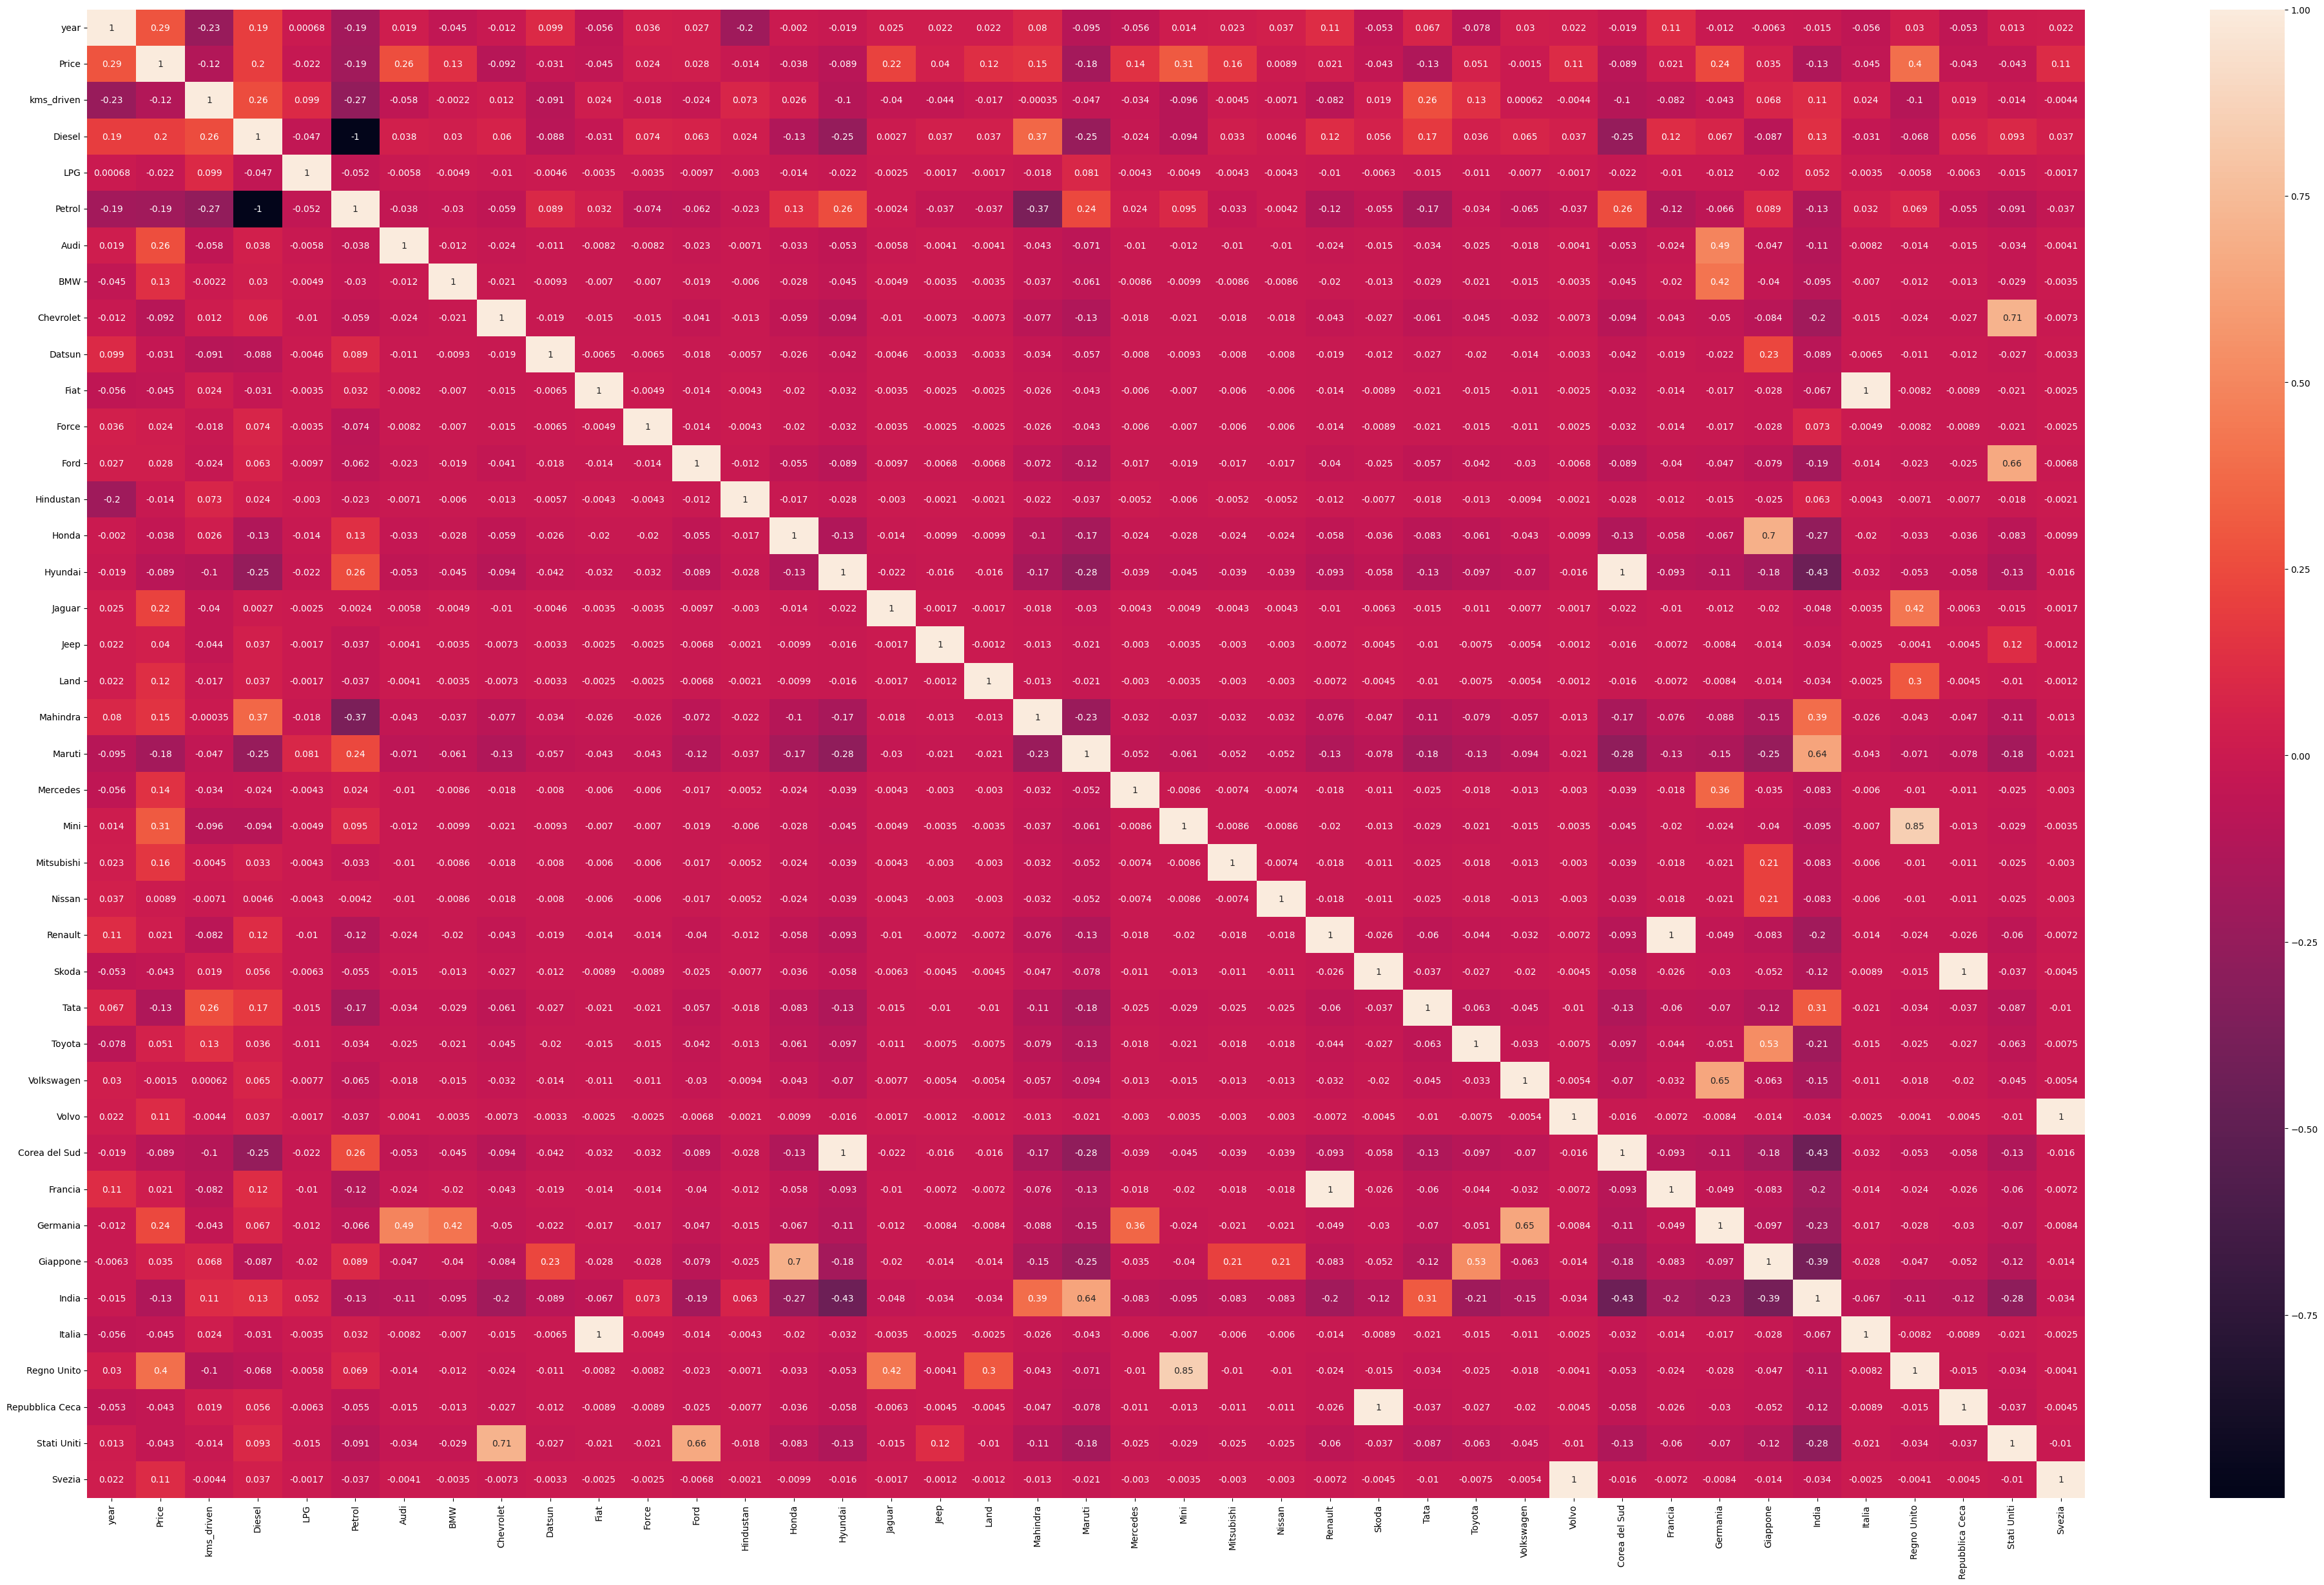

In [3034]:
df_corr = df_finale.corr()
plt.figure(figsize=(50, 30))
sns.heatmap(data=df_corr, annot=True)

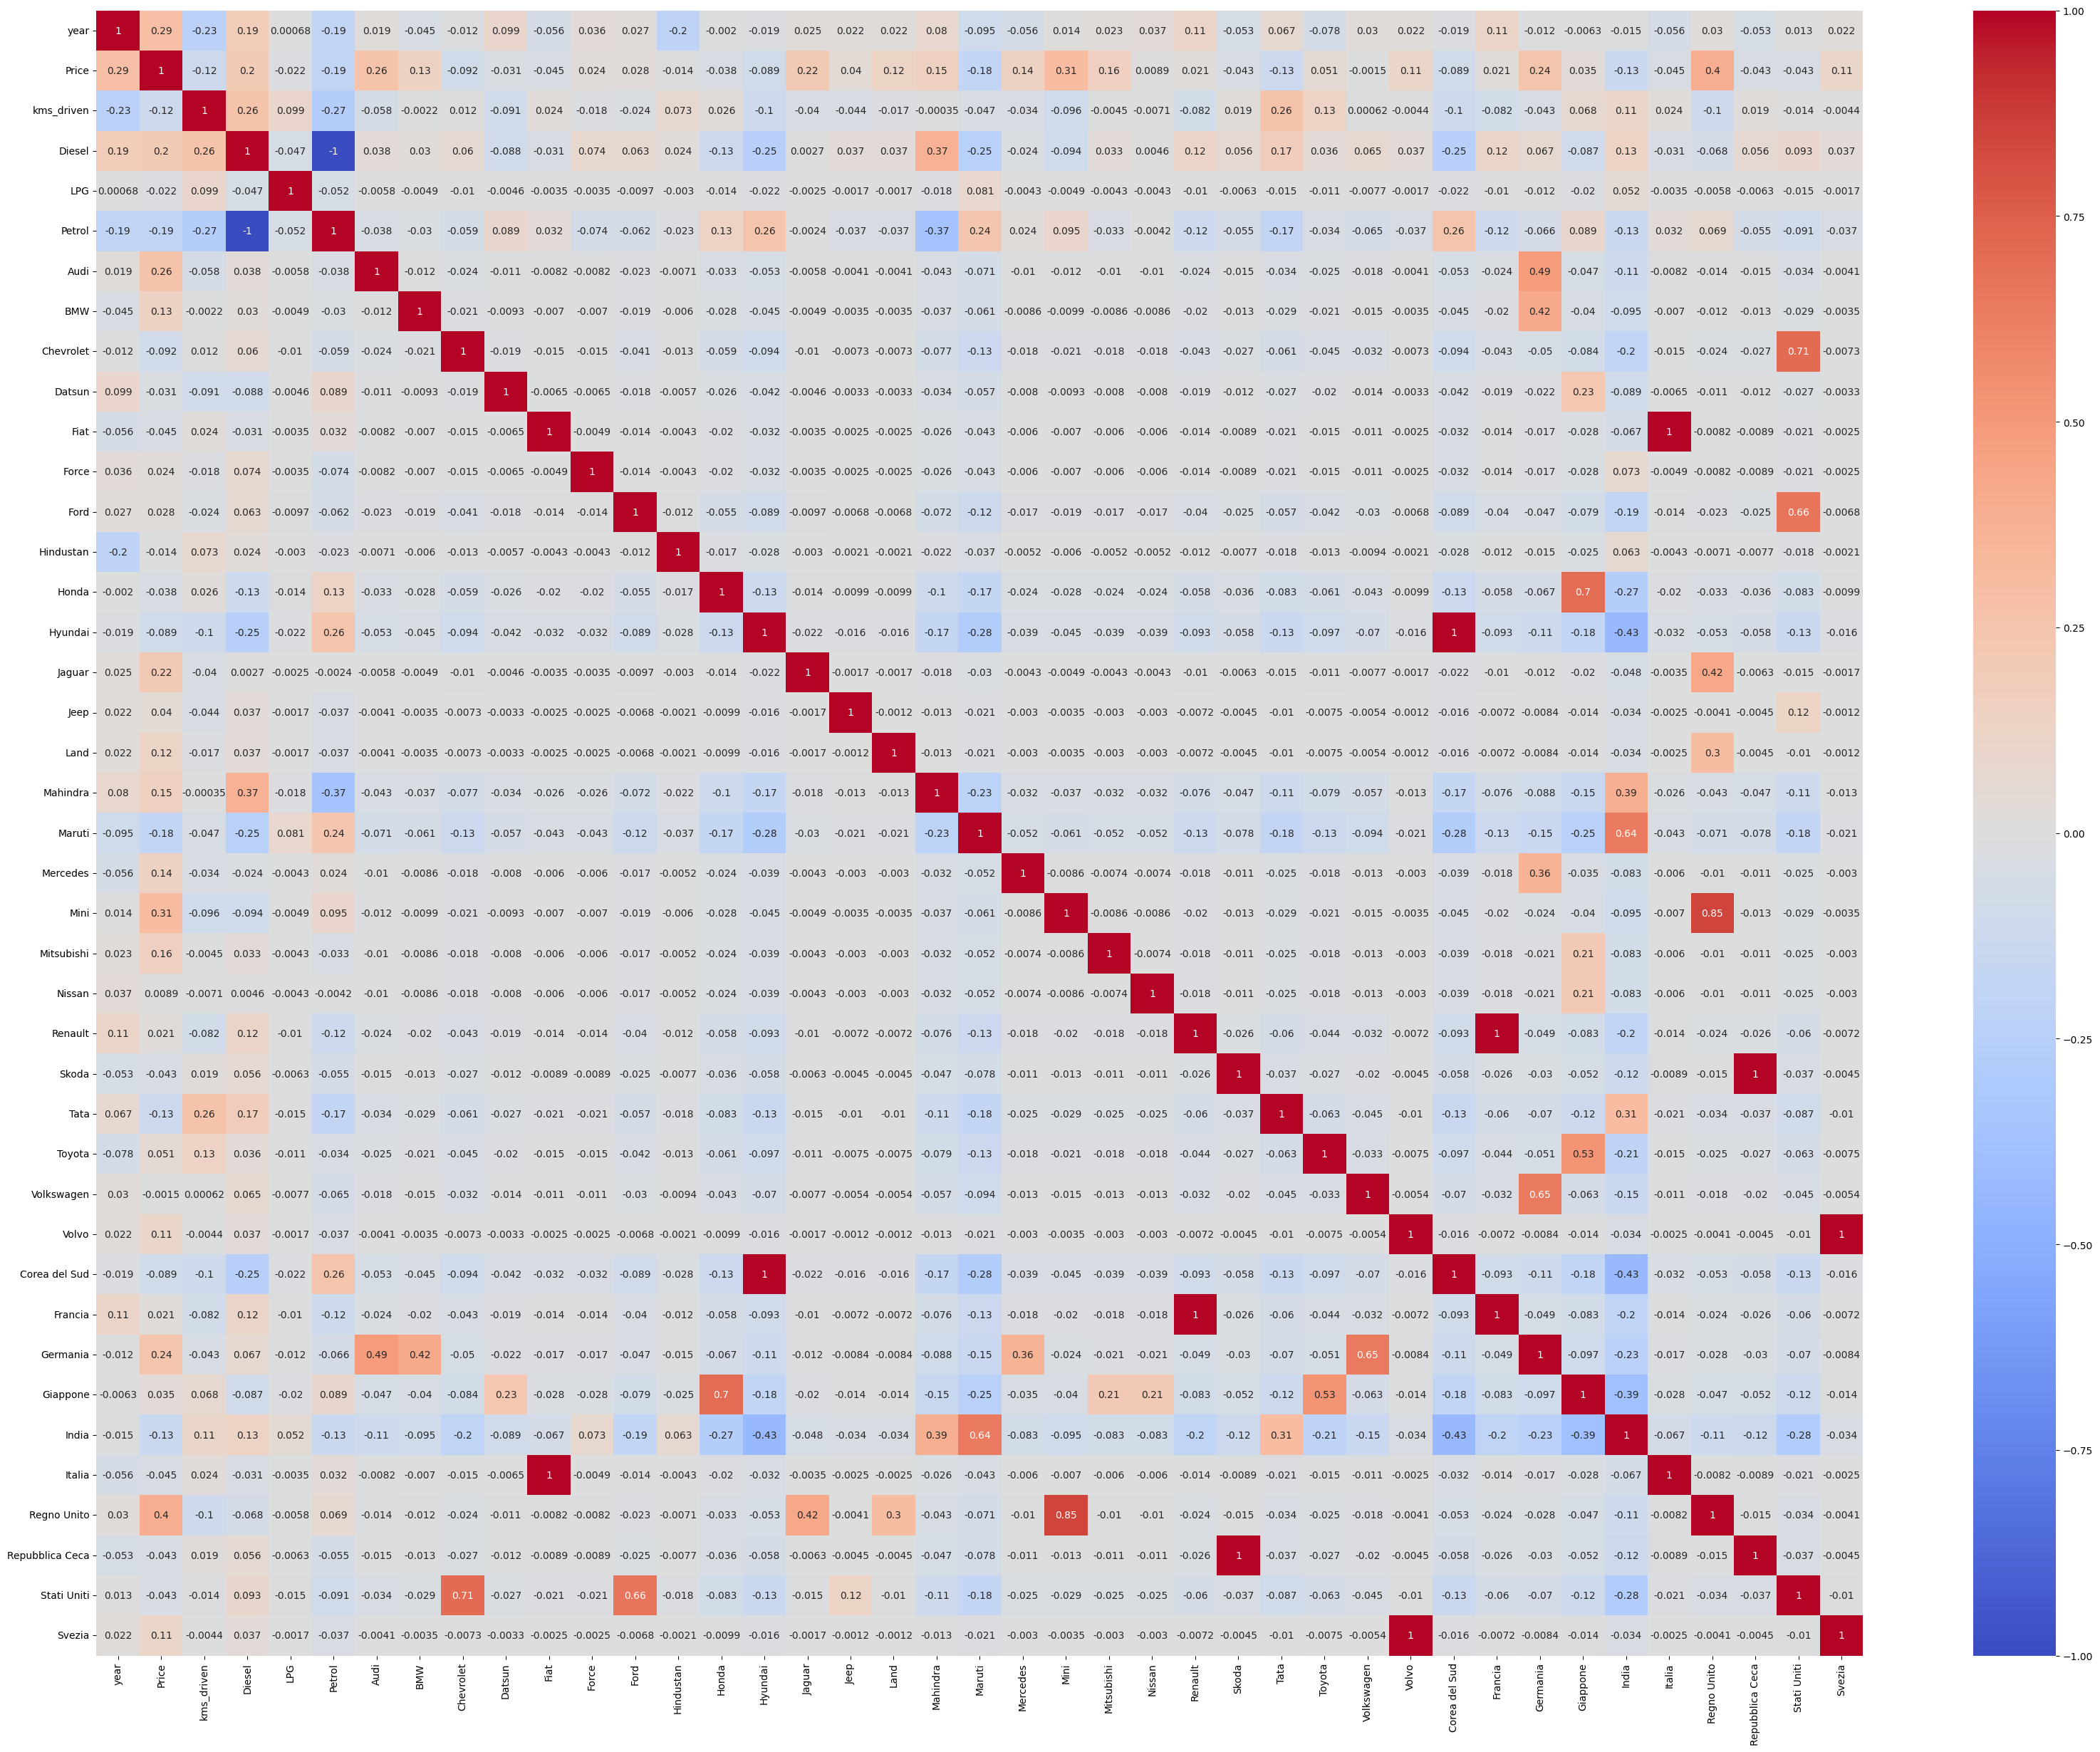

In [3035]:
target = "Price"
correlation_matrix = df_finale.corr()

target_corr = correlation_matrix[target]
high_corr_features = target_corr[abs(target_corr) > 0.0001].index

filtered_corr_matrix = correlation_matrix.loc[high_corr_features, high_corr_features]

plt.figure(figsize=(40, 30))

sns.heatmap(filtered_corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, cbar=True)

plt.show()

In [3036]:
#sns.pairplot(df_finale)

## model

In [3037]:
df_finale

,year,Price,kms_driven,Diesel,LPG,Petrol,Audi,BMW,Chevrolet,Datsun,...,Corea del Sud,Francia,Germania,Giappone,India,Italia,Regno Unito,Repubblica Ceca,Stati Uniti,Svezia
0,2007,800.0,45000.0,0.0,0.0,1.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2006,4250.0,40.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2014,3250.0,28000.0,0.0,0.0,1.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2014,5750.0,36000.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,2012,1750.0,41000.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,2011,2700.0,50000.0,0.0,0.0,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
885,2009,1100.0,30000.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
886,2009,3000.0,132000.0,0.0,0.0,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
888,2018,2600.0,27000.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [3038]:
df_finale["eta"] = 2024 - df_finale["year"] 

In [3039]:
df_finale

,year,Price,kms_driven,Diesel,LPG,Petrol,Audi,BMW,Chevrolet,Datsun,...,Francia,Germania,Giappone,India,Italia,Regno Unito,Repubblica Ceca,Stati Uniti,Svezia,eta
0,2007,800.0,45000.0,0.0,0.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
1,2006,4250.0,40.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,18
3,2014,3250.0,28000.0,0.0,0.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
4,2014,5750.0,36000.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,10
6,2012,1750.0,41000.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,2011,2700.0,50000.0,0.0,0.0,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,13
885,2009,1100.0,30000.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,15
886,2009,3000.0,132000.0,0.0,0.0,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15
888,2018,2600.0,27000.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,6


In [3040]:
# X = df_finale.drop("Price", axis=1)
# y = df_finale["Price"]

In [3041]:
X = df_finale[high_corr_features].drop("Price", axis=1)
y = df_finale["Price"]

In [3042]:
model = LinearRegression()

In [3043]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=660)

In [3044]:
model.fit(X_train, y_train)

LinearRegression()

In [3045]:
y_pred = model.predict(X_test)

In [3046]:
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_percentage_error,r2_score

print(r2_score(y_test, y_pred))
print(root_mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))


0.574297666631197
2521.1534078944924
6356214.506138014
0.5120424992068847


In [3047]:
model.score(X_test,y_test)

0.574297666631197

In [3048]:
model.coef_

array([ 3.11469600e+02,  2.23822455e-03,  8.46482627e+02, -8.10797870e+02,
       -3.56847569e+01,  6.04312934e+03,  1.23597860e+03, -3.34732089e+03,
       -4.03260136e+03, -2.74283812e+03,  2.98231719e+02, -1.66211607e+03,
       -5.94206867e+02, -2.28538204e+03, -2.09579665e+03,  6.57173746e+03,
        2.79695395e+03,  1.99973894e+03,  1.20139650e+03, -1.27442233e+03,
        1.53910750e+03,  1.45400534e+03,  6.17778032e+03, -1.74919264e+03,
       -1.92787964e+03, -2.60146481e+03, -3.03565062e+03, -5.90273612e+01,
       -6.65934126e+03,  4.74918099e+03, -2.09579665e+03, -1.92787964e+03,
        2.15887418e+03, -1.94842309e+03, -3.40465159e+03, -2.74283812e+03,
        1.00254817e+04, -2.60146481e+03, -2.21248301e+03,  4.74918099e+03])

In [3049]:
model.intercept_

-619550.0936445532

In [3050]:
df

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,800.0,45000.0,Petrol
1,Mahindra Jeep CL550 MDI,2006,4250.0,40.0,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250.0,28000.0,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,5750.0,36000.0,Diesel
6,Ford Figo,2012,1750.0,41000.0,Diesel
...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,2011,2700.0,50000.0,Petrol
885,Tata Indica V2 DLE BS III,2009,1100.0,30000.0,Diesel
886,Toyota Corolla Altis,2009,3000.0,132000.0,Petrol
888,Tata Zest XM Diesel,2018,2600.0,27000.0,Diesel


In [3051]:
df_finale

,year,Price,kms_driven,Diesel,LPG,Petrol,Audi,BMW,Chevrolet,Datsun,...,Francia,Germania,Giappone,India,Italia,Regno Unito,Repubblica Ceca,Stati Uniti,Svezia,eta
0,2007,800.0,45000.0,0.0,0.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
1,2006,4250.0,40.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,18
3,2014,3250.0,28000.0,0.0,0.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
4,2014,5750.0,36000.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,10
6,2012,1750.0,41000.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,2011,2700.0,50000.0,0.0,0.0,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,13
885,2009,1100.0,30000.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,15
886,2009,3000.0,132000.0,0.0,0.0,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15
888,2018,2600.0,27000.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,6


---

In [3052]:
cross_val_score(model, X,y,cv=5, scoring='r2').mean()

0.5028042403538325

---

In [3053]:
def overfit_eval(model, X, y):

    """
    model: il nostro modello predittivo già addestrato
    X: una tupla contenente le prorietà del train set e test set (X_train, X_test)
    y: una tupla contenente target del train set e test set (y_train, y_test)
    """

    y_pred_train = model.predict(X[0])
    y_pred_test = model.predict(X[1])

    mse_train = mean_squared_error(y[0], y_pred_train)
    mse_test = mean_squared_error(y[1], y_pred_test)

    r2_train = r2_score(y[0], y_pred_train)
    r2_test = r2_score(y[1], y_pred_test)

    print("Train set:  MSE="+str(mse_train)+" R2="+str(r2_train))
    print("Test set:  MSE="+str(mse_test)+" R2="+str(r2_test))

In [3054]:
from sklearn.linear_model import ElasticNet

alphas = [0.0001, 0.001, 0.01, 0.1 ,1 ,10]

for alpha in alphas:
    print("Lambda is: "+str(alpha))
    elastic = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic.fit(X_train, y_train)
    overfit_eval(elastic, (X_train, X_test),(y_train, y_test))

Lambda is: 0.0001
Train set:  MSE=14116860.708093883 R2=0.4374053191421837
Test set:  MSE=6349209.844573708 R2=0.5747667981826108
Lambda is: 0.001
Train set:  MSE=14127382.383395784 R2=0.436986002221732
Test set:  MSE=6300231.389184639 R2=0.5780470906780564
Lambda is: 0.01
Train set:  MSE=14536667.532214131 R2=0.4206748936515893
Test set:  MSE=6209616.309396877 R2=0.5841159624675152
Lambda is: 0.1
Train set:  MSE=17612615.190044068 R2=0.29809014717888427
Test set:  MSE=8237988.58751689 R2=0.44826736722227234
Lambda is: 1
Train set:  MSE=21359478.15544057 R2=0.14876763009641303
Test set:  MSE=11378323.781972438 R2=0.2379459536593812
Lambda is: 10
Train set:  MSE=22957055.60829496 R2=0.0850998929259994
Test set:  MSE=12777428.562232997 R2=0.1442420408966495


In [3055]:
ratios = [0.1, 0.2, 0.3, 0.4 ,0.5, 0.6, 0.7, 0.8, 0.9, 0.99]

for ratio in ratios:
    print("Lambda is: "+str(ratio))
    elastic = ElasticNet(alpha=0.001, l1_ratio=ratio)
    elastic.fit(X_train, y_train)
    overfit_eval(elastic, (X_train, X_test),(y_train, y_test))

Lambda is: 0.1
Train set:  MSE=14147226.627050238 R2=0.43619515600198855
Test set:  MSE=6266195.372891946 R2=0.580326625382303
Lambda is: 0.2
Train set:  MSE=14141550.03668263 R2=0.43642138332067226
Test set:  MSE=6273921.152934688 R2=0.57980919750316
Lambda is: 0.3
Train set:  MSE=14136320.817773795 R2=0.43662978168940214
Test set:  MSE=6282148.164096835 R2=0.5792582000745812
Lambda is: 0.4
Train set:  MSE=14131582.08065033 R2=0.43681863304628454
Test set:  MSE=6290906.0901888795 R2=0.578671645047331
Lambda is: 0.5
Train set:  MSE=14127382.383395784 R2=0.436986002221732
Test set:  MSE=6300231.389184639 R2=0.5780470906780564
Lambda is: 0.6
Train set:  MSE=14123777.25231691 R2=0.4371296763438126
Test set:  MSE=6310161.702998832 R2=0.5773820159299174
Lambda is: 0.7
Train set:  MSE=14120831.751990004 R2=0.43724706241502553
Test set:  MSE=6320693.629839073 R2=0.5766766486352123
Lambda is: 0.8
Train set:  MSE=14118622.175002987 R2=0.4373351199715564
Test set:  MSE=6331679.279934591 R2=0.575

In [3056]:
elastic = ElasticNet(alpha=0.001, l1_ratio= 0.1)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.1)

In [3057]:
elastic.score(X_test, y_test)

0.580326625382303

In [3058]:
cross_val_score(elastic, X,y,cv=5, scoring='r2').mean()

0.5045742744530093